Exploration du dataset

In [95]:
import pandas as pd
import matplotlib as plt
import seaborn as sns

df_xtrain = pd.read_csv('data/X_train_update.csv', index_col=0)
df_ytrain = pd.read_csv('data/Y_train_CVw08PX.csv',index_col=0)
df_xtest = pd.read_csv('data/X_test_update.csv',index_col=0)
print("Informations sur le dataframe: ");print(df_xtrain.info())

Informations sur le dataframe: 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 84916 entries, 0 to 84915
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   designation  84916 non-null  object
 1   description  55116 non-null  object
 2   productid    84916 non-null  int64 
 3   imageid      84916 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 3.2+ MB
None


In [92]:
xtrain = pd.concat([df_xtrain, df_ytrain['prdtypecode'] ], axis = 1)

AttributeError: module 'matplotlib' has no attribute 'title'

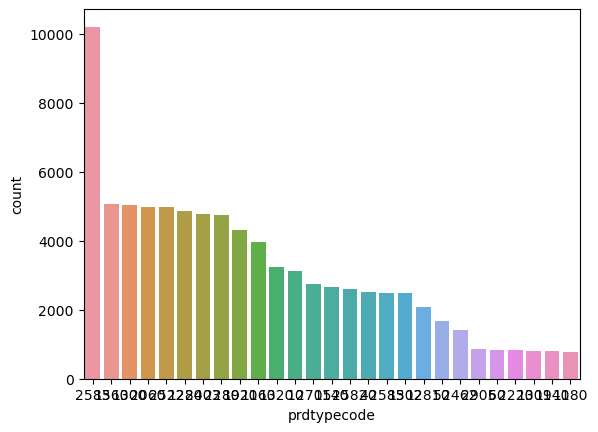

In [93]:
large_to_small = df_ytrain.groupby('prdtypecode').size().sort_values().index[::-1]
sns.countplot(x= df_ytrain["prdtypecode"],order=large_to_small)
plt.title('Nombre de produits par classe')
plt.xlabel('Classe')
plt.ylabel('Nombres de produits');

On remarque qu'il existe des données manquantes pour description (2)

In [42]:
missing_data = df_xtrain['description'].isnull().sum()
print("Nombre de données manquantes dans la colonne 'description':", missing_data)


Nombre de données manquantes dans la colonne 'description': 29800


Prepocessing de data

In [89]:
import unidecode

xtrain['designation'] = xtrain['designation'].astype('string')
#xtest['designation'] = xtest['designation'].astype('string')

xtrain['description'] = xtrain['description'].astype('string')
#xtest['description'] = xtest['description'].astype('string')

#Traitement des données manquantes
xtrain['description'].fillna('NO_DESCRIPTION', inplace=True)
xtrain['description'] = xtrain['description'].astype(str)

def create_text(text1, text2):
    if pd.isna(text2):
        text = text1
    else:
        text = text1 + text2
    return text

#Définition des stopwords
stopwords=["le","la","un","des","de",'a','et','pour','en','ses','tous','mais'] #à compléter
stopwords= [
    'a', 'à', 'abord', 'absolument', 'afin', 'ah', 'ai', 'aie', 'aient', 'aies', 'ailleurs', 'ainsi', 'ait', 'allaient', 'allo', 'allons', 'allô', 'alors', 'après', 'as', 'assez', 'attendu', 'au', 'aucun', 'aucune', "aujourdhui", 'aura', 'auront', 'aussi', 'autre', 'autrement', 'autres', 'autrui', 'aux', 'auxquelles', 'auxquels', 'avaient', 'avais', 'avait', 'avant', 'avec', 'avoir', 'avons', 'ayant', 'b', 'bah', 'bas', 'basee', 'bat', 'beau', 'beaucoup', 'bien', 'bigre', 'boum', 'bravo', 'brrr', 'c', 'car', 'ce', 'ceci', 'cela', 'celle', 'celle-ci', 'celle-là', 'celles', 'celles-ci', 'celles-là', 'celui', 'celui-ci', 'celui-là', 'cent', 'cependant', 'certain', 'certaine', 'certaines', 'certains', 'certes', 'ces', 'cet', 'cette', 'ceux', 'ceux-ci', 'ceux-là', 'chacun', 'chacune', 'chaque', 'cher', 'chers', 'chez', 'chiche', 'chut', 'chère', 'chères', 'ci', 'cinq', 'cinquantaine', 'cinquante', 'cinquantième', 'cinquième', 'clac', 'clic', 'combien', 'comme', 'comment', 'comparable', 'comparables', 'compris', 'concernant', 'contre', 'couic', 'crac', 'd', 'da', 'dans', 'de', 'debout', 'dedans', 'dehors', 'deja', 'delà', 'depuis', 'dernier', 'derniere', 'derriere', 'derrière', 'des', 'desormais', 'desquelles', 'desquels', 'dessous', 'dessus', 'deux', 'deuxième', 'deuxièmement', 'devant', 'devers', 'devra', 'different', 'differentes', 'differents', 'dire', 'divers', 'diverse', 'diverses', 'dix', 'dix-huit', 'dix-neuf', 'dix-sept', 'dixième', 'doit', 'doivent', 'donc', 'dont', 'douze', 'douzième', 'dring', 'droite', 'du', 'duquel', 'durant', 'dès', 'désormais', 'e', 'effet', 'eh', 'elle', 'elle-même', 'elles', 'elles-mêmes', 'en', 'encore', 'enfin', 'entre', 'envers', 'environ', 'es', 'est', 'et', 'etaient', 'etais', 'etait', 'etant', 'etc', 'etre', 'eu', 'euh', 'eux', 'eux-mêmes', 'exactement', 'excepté', 'extenso', 'exterieur', 'f', 'fais', 'faisaient', 'faisant', 'fait', 'façon', 'feront', 'fi', 'flac', 'floc', 'font', 'force', 'furent', 'fut', 'g', 'gens', 'h', 'ha', 'haut', 'hein', 'hem', 'hep', 'hi', 'ho', 'holà', 'hop', 'hormis', 'hors', 'hou', 'houp', 'hue', 'hui', 'huit', 'huitième', 'hum', 'hurrah', 'hé', 'hélas', 'i', 'il', 'ils', 'importe', 'j', 'je', 'jusqu', 'jusque', 'juste', 'k', 'l', 'la', 'laisser', 'laquelle', 'las', 'le', 'lequel', 'les', 'lesquelles', 'lesquels', 'leur', 'leurs', 'longtemps', 'lors', 'lorsque', 'lui', 'lui-meme', 'lui-même', 'là', 'lès', 'm', 'ma', 'maint', 'maintenant', 'mais', 'malgre', 'malgré', 'maximale', 'me', 'meme', 'memes', 'merci', 'mes', 'mien', 'mienne', 'miennes', 'miens', 'mille', 'mince', 'mine', 'minimale', 'moi', 'moi-meme', 'moi-même', 'moindres', 'moins', 'mon', 'moyennant', 'multiple', 'multiples', 'même', 'mêmes', 'n', 'na', 'ne', 'neanmoins', 'necessaire', 'necessairement', 'neuf', 'neuvième', 'ni', 'nombreuses', 'nombreux', 'non', 'nos', 'notamment', 'notre', 'nous', 'nous-mêmes', 'nouveau', 'nul', 'néanmoins', 'nôtre', 'nôtres', 'o', 'oh', 'ohé', 'ollé', 'olé', 'on', 'ont', 'onze', 'onzième', 'ore', 'ou', 'ouf', 'ouias', 'oust', 'ouste', 'outre', 'ouvert', 'ouverte', 'ouverts', 'o|', 'p', 'paf', 'pan', 'par', 'parbleu', 'parce', 'parfois', 'parle', 'parlent', 'parler', 'parmi', 'parseme', 'partant', 'particulier', 'particulière', 'particulièrement', 'pas', 'passé', 'pendant', 'pense', 'permet', 'personne', 'peu', 'peut', 'peuvent', 'peux', 'pff', 'pfft', 'pfut', 'pif', 'pire']
# Prétraitement du texte
X_train['description'] = X_train['description'].str.lower()  # Conversion en minuscules
X_train['description'] = X_train['description'].apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords]))  # Suppression des stopwords
X_train['description'] = X_train['description'].apply(unidecode.unidecode)  # Suppression des accents
X_train['description'] = X_train['description'].apply(lambda x: x.split())  # Tokenisation
X_train['description'][4]

['luc',
 'id&eacute;es',
 'grandeur.',
 'veut',
 'organiser',
 'un',
 'jeu',
 'guerre',
 'boules',
 'neige',
 "s'arranger",
 'pour',
 '&ecirc;tre',
 'vainqueur',
 'incontest&eacute;.',
 'sophie',
 "s'en",
 'm&ecirc;le',
 'chambarde',
 'tous',
 'ses',
 'plans...']

Création de la matrice TF-IDF :

In [44]:
import numpy as np
# Création de la matrice TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

X_train['description'] = X_train['description'].astype(str)
X_train_tfidf = tfidf.fit_transform(X_train['description'])

In [87]:
# Affichage de la matrice TF-IDF

print(X_train_tfidf.shape)

(84916, 134538)


Entrainement du modèle

Régression logistique

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Division des données en ensembles d'entraînement et de test
#y_train = y_train.iloc[:, 0]
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X_train_tfidf, y_train, test_size=0.2, random_state=42)
print(X_train_split.shape)
# Entraînement du modèle
model = LogisticRegression()
model.fit(X_train_split, y_train_split) #unable to train, too big of a dataset

# Prédiction
#y_pred = model.predict(X_test_split)

# Évaluation du modèle
#accuracy = accuracy_score(y_test_split, y_pred)
#report = classification_report(y_test_split, y_pred)

#print("Accuracy:", accuracy)
#print("Classification Report:\n", report)


(67932, 134538)


MemoryError: Unable to allocate 68.1 GiB for an array with shape (67932, 134539) and data type float64